In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [127]:
len(np.linspace(0.005, 1, 200))

200

In [128]:
n_trials = 10_000
all_corners = list()
r = 10
c = 10

for prob in np.linspace(0.005, 1, 200):
    corners = np.zeros(n_trials)
    for i in range(n_trials):
        grid = np.random.choice(a=(0,1), replace=True, size=(10,10), p=(1-prob, prob))
        corners[i] = 1 in [grid[(0,0)], grid[(r-1,c-1)], grid[(r-1, 0)], grid[(0, c-1)]]
    # end
    all_corners.append(corners.sum() / n_trials)
        

In [ ]:
print('{:.1%} of trials had a one in a corner'.format(corners.sum() / n_trials))

In [156]:
x = np.linspace(0.005, 1, 200)

In [196]:
dydx_ac = [(all_corners[i+1] - all_corners[i])/0.005 for i in range(len(all_corners)-1)]

In [247]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

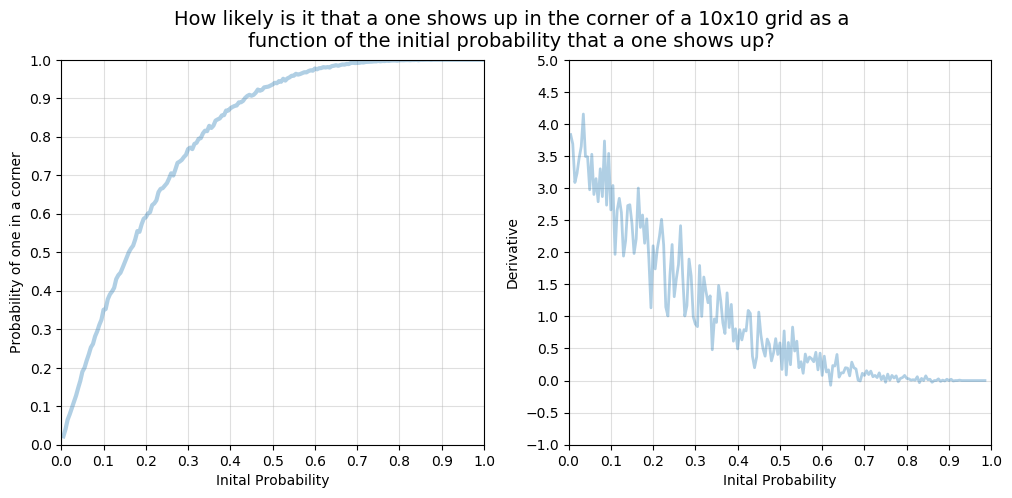

In [296]:
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('How likely is it that a one shows up in the corner of a 10x10 grid as a\n\
function of the initial probability that a one shows up?', 
             fontsize=14)

ax1.plot(x, all_corners, linewidth=3, alpha=0.35)
ax2.set(xlabel='Inital Probability', ylabel='Derivative')
ax1.set(xlabel='Inital Probability', ylabel='Probability of one in a corner')
ax1.grid(alpha=0.4)
ax1.set_xlim((0,1))
ax1.set_ylim((0,1))
ax1.set_xticks(np.linspace(0, 1, 11))
ax1.set_yticks(np.linspace(0, 1, 11))

n_avg = 3
ax2.plot(x[:-n_avg], moving_average(dydx_ac, n_avg), alpha=0.35, linewidth=2)

ax2.grid(alpha=0.4)
ax2.set_xticks(np.linspace(0, 1, 11))
ax2.set_xlim((0,1))
ax2.set_ylim((-1,5))
ax2.set_yticks(np.arange(-1, 5.5, 0.5))
plt.savefig('one_in_corner.png', dpi=300)
plt.show()